In [89]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [90]:
df = pd.read_csv('Loan Application Status Prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [91]:
df.shape

(614, 13)

In [92]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [93]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Observations: 
    
    Gender, Married, Dependendts and Self_Employed can be encoded with mode. 
    
    LoanAmount, Loan_Amount_Term, Credit_History can be encoded with mean/median.

In [94]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [95]:
col = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

for i in col:
    a = df[i].nunique()
    print('Unique values in ', i, '=', a)

Unique values in  Loan_ID = 614
Unique values in  Gender = 2
Unique values in  Married = 2
Unique values in  Dependents = 4
Unique values in  Education = 2
Unique values in  Self_Employed = 2
Unique values in  ApplicantIncome = 505
Unique values in  CoapplicantIncome = 287
Unique values in  LoanAmount = 203
Unique values in  Loan_Amount_Term = 10
Unique values in  Credit_History = 2
Unique values in  Property_Area = 3
Unique values in  Loan_Status = 2


Observations: 
    
    We can see that all the values in Loan_ID is unique. Even if we encode it, it will be the same as the index values which is useless. Hence we can remove it. 
    
    Gender, Married, Dependents, Education, Self_Employed, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status can all be encoded. 

### Dropping unwanted columns

In [96]:
df = df.drop(['Loan_ID'], axis = 1)

In [97]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [98]:
new_col = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

### Separating categorical and numerical values for plotting

In [99]:
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 
            'Property_Area', 'Loan_Status']
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'] 

### Univariate Analysis

Male      489
Female    112
Name: Gender, dtype: int64


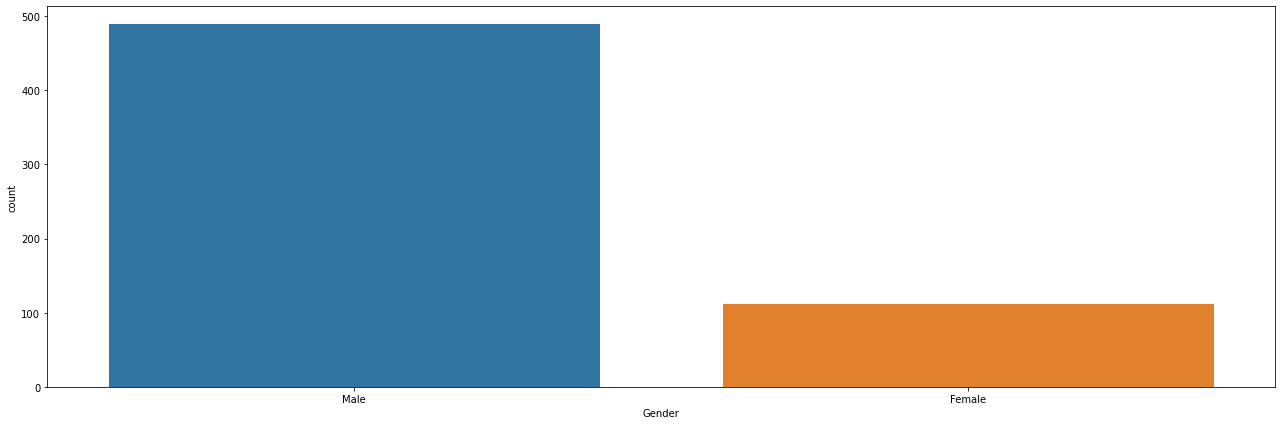

Yes    398
No     213
Name: Married, dtype: int64


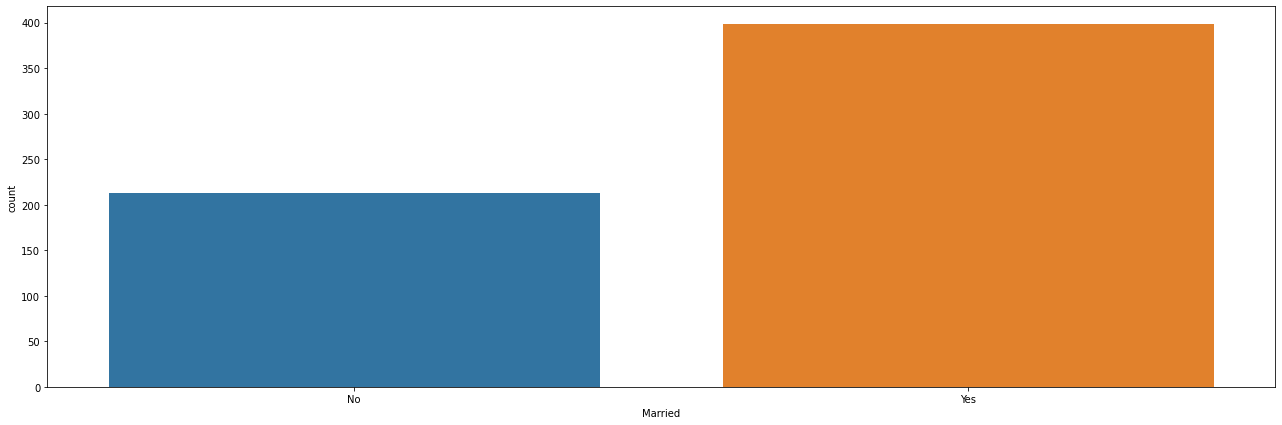

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


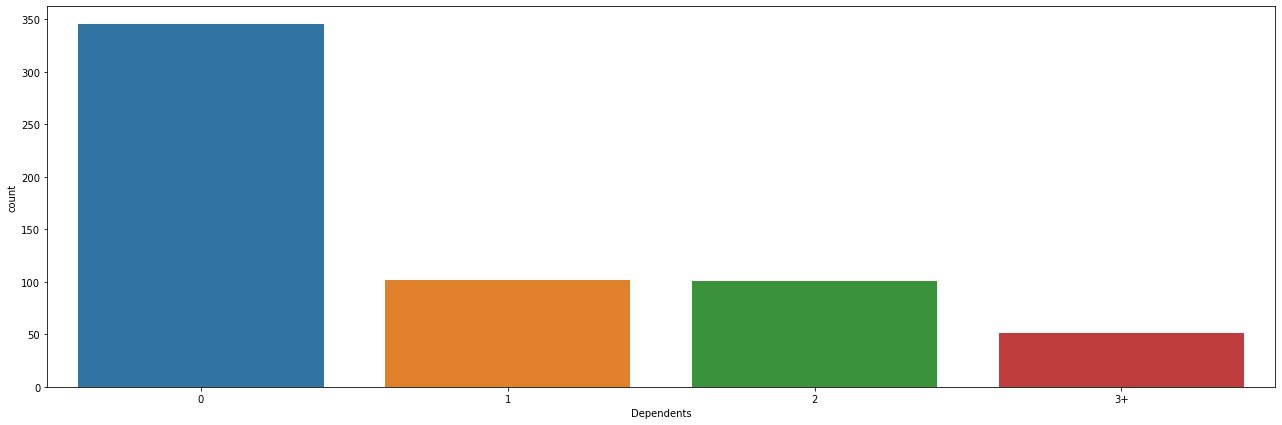

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


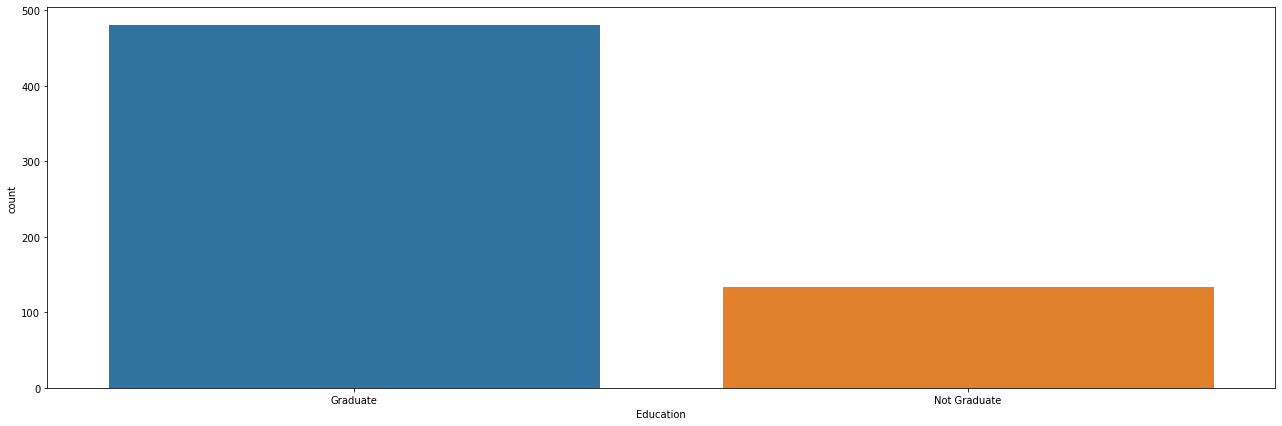

No     500
Yes     82
Name: Self_Employed, dtype: int64


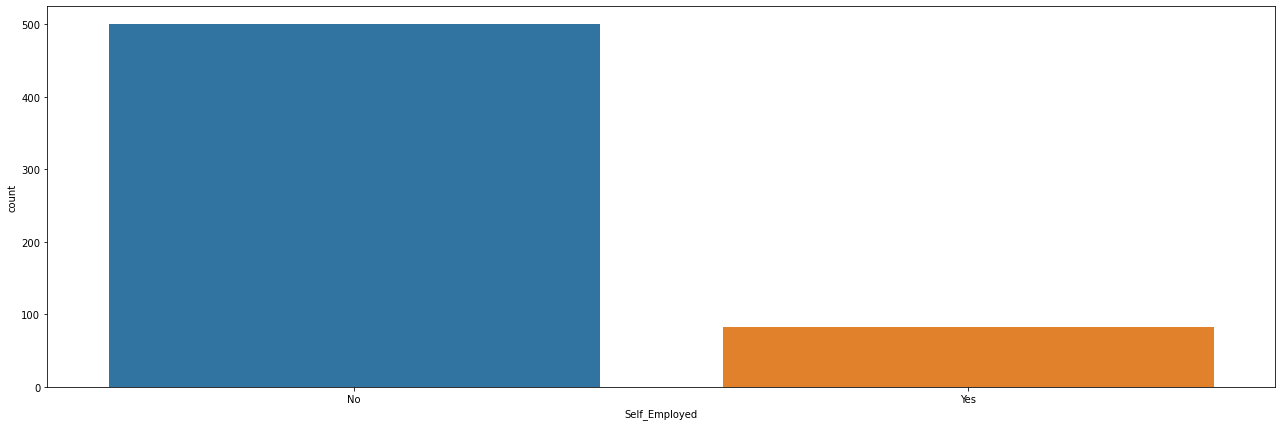

1.0    475
0.0     89
Name: Credit_History, dtype: int64


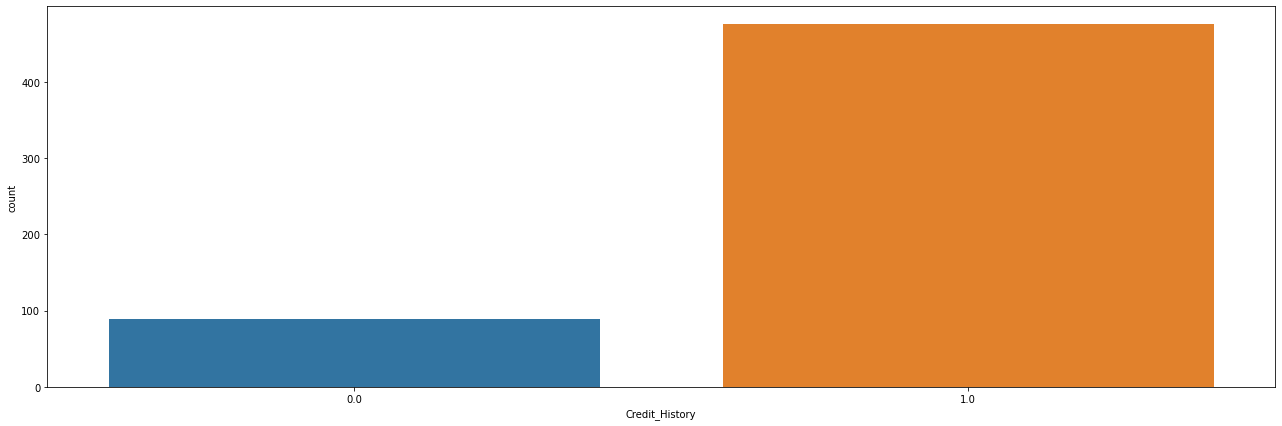

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


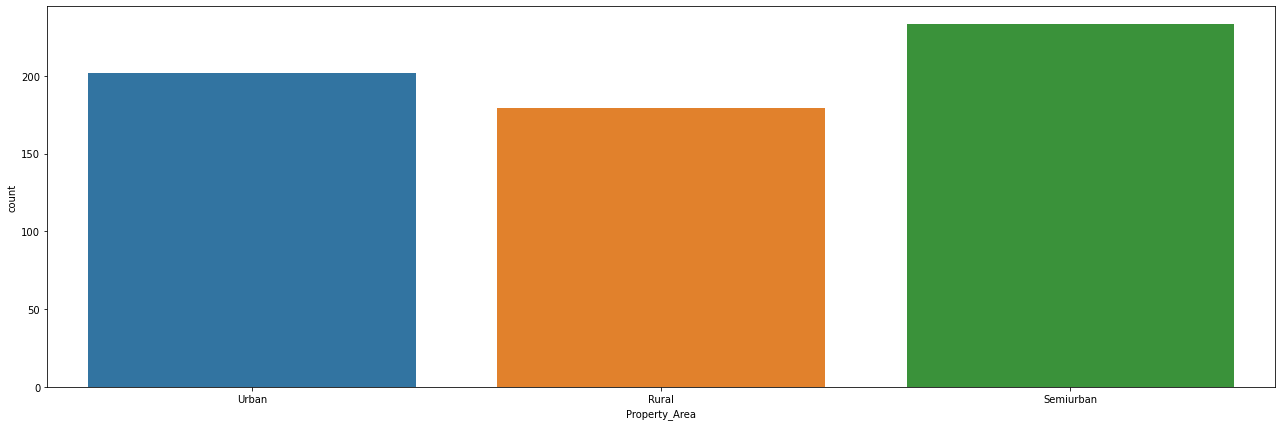

Y    422
N    192
Name: Loan_Status, dtype: int64


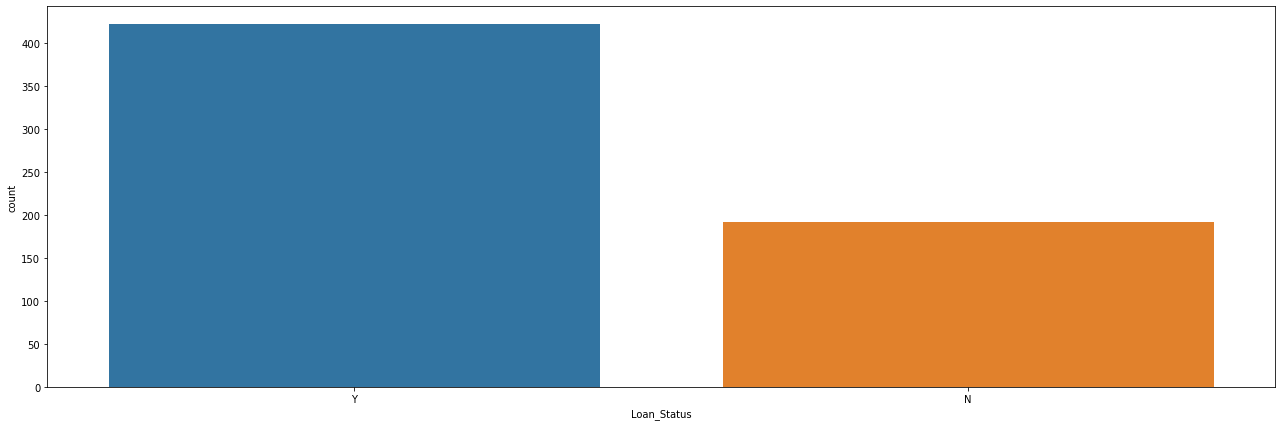

In [100]:
for i in cat_cols:
    plt.figure(figsize = (22,7))
    ax = sb.countplot(x = i, data = df)
    print(df[i].value_counts())
    plt.show()

Observations: 

    We can see that the highest number of loan applicants are male. 
    
    Married people apply for loans the highest. 
    
    People with less dependents apply for the loans the highest. Higher the number of dependents, lesser chance of applying for loans.
    
    Highest number of people applying for loans are graduates. 
    
    Salaried people take apply for loans while self_employed people tend to not do it. 
    
    People with highest credit history takes out the highest number of loans. 
    
    People in Semi-urban areas take out the highest number of loans. However, it definitely doesn't overshadow the urban and rual area's applicant count. 
    
    The chances of a loan getting approved is higher compared to the ones getting rejected. 

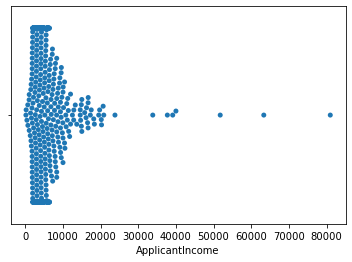

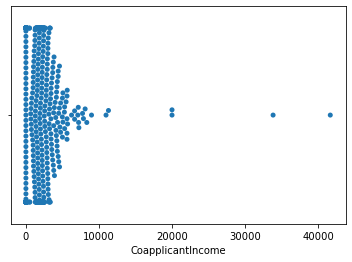

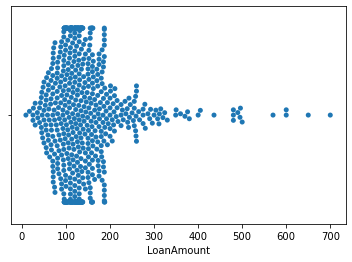

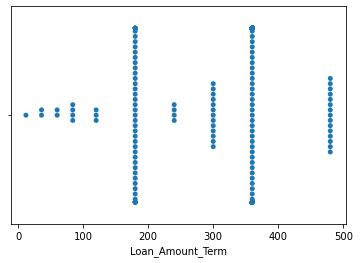

In [101]:
for i in num_cols:
    sb.swarmplot(x = i, data = df)
    plt.show()

Observations: 
    
    We can see that most of the applicant's income is in the lower range. 
    
    The co-applicant's income is lower than the applicant's income in most cases.
    
    Compared to the applicant's income, most of the loane amount requests are in the lower range. 
    
    Most of the loans are given out in either 180 or 360 months. 

### Handling NaN values

In [102]:
from sklearn.impute import SimpleImputer

In [103]:
si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['Gender'] = si.fit_transform(df['Gender'].values.reshape(-1, 1))
df['Married'] = si.fit_transform(df['Married'].values.reshape(-1, 1))
df['Dependents'] = si.fit_transform(df['Dependents'].values.reshape(-1, 1))
df['Self_Employed'] = si.fit_transform(df['Self_Employed'].values.reshape(-1, 1))
df['Credit_History'] = si.fit_transform(df['Credit_History'].values.reshape(-1, 1))
df['Loan_Amount_Term'] = si.fit_transform(df['Loan_Amount_Term'].values.reshape(-1, 1))

In [104]:
df['LoanAmount'] = df['LoanAmount'].fillna(np.mean(df['LoanAmount']))

In [105]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We have removed all the null values. 

### Encoding

In [106]:
from sklearn.preprocessing import OrdinalEncoder

In [107]:
oe = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = oe.fit_transform(df[i].values.reshape(-1,1))

In [108]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


### Bivariate Analysis

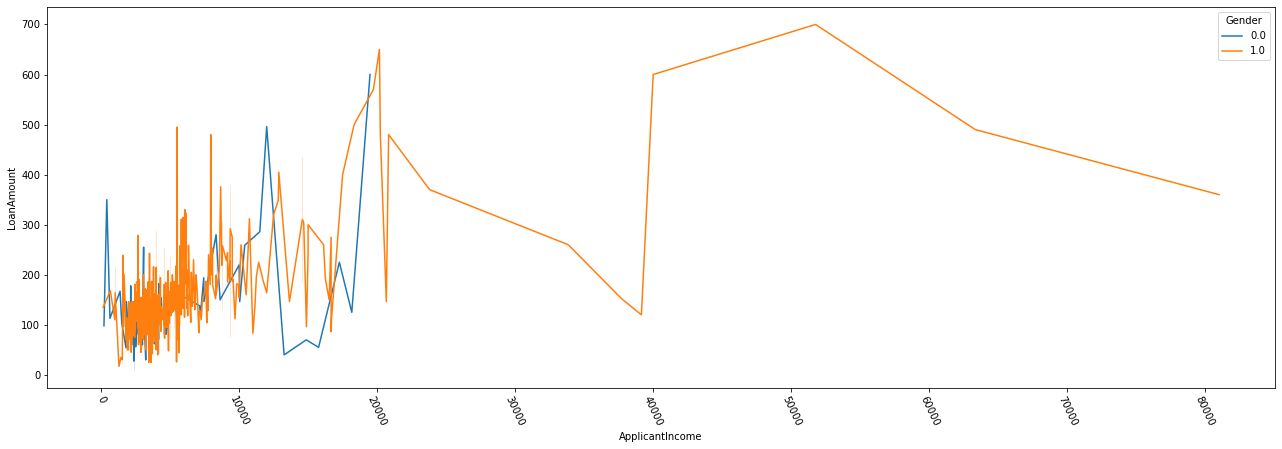

In [109]:
plt.figure(figsize = (22,7))
sb.lineplot(x="ApplicantIncome", y="LoanAmount", hue = 'Gender', data = df)
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

Observations: 


    Women are plotted in blue
    We can see that the highest number of loan applications and the applied amount is in the lower section. 
    The highest number of female applicants are under 20,000
    Highest loan amount for women are under 600 units.
    
    Men are plotted in yellow. 
    The higest number of loan applications are from men. 
    We can see that there are high loan amounts are taken by the men with salaries between 40,000 and 55,000.

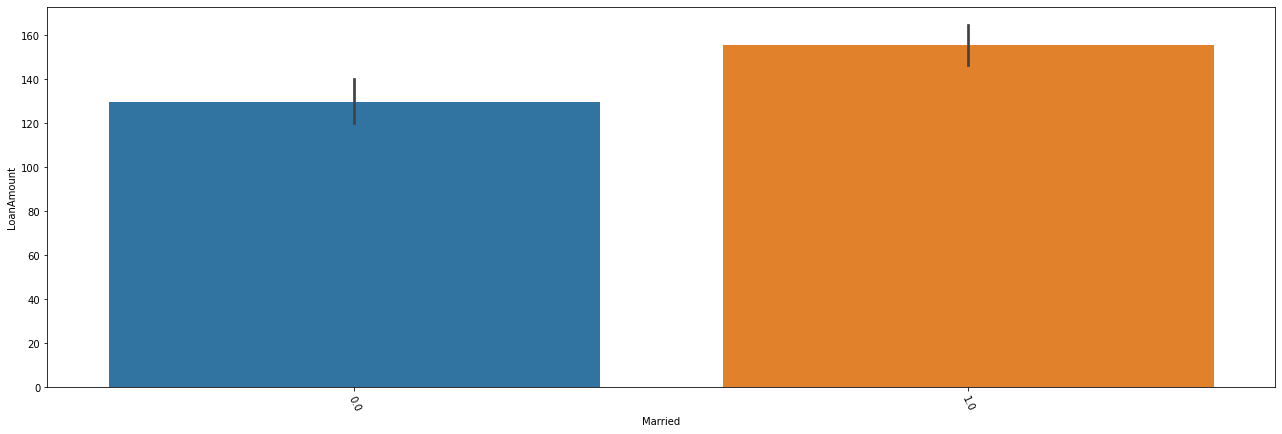

In [110]:
plt.figure(figsize = (22,7))
sb.barplot(x="Married", y="LoanAmount", data = df)
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

Observation: 
    
    Married people opt for higher loan amounts when compared to unmarried people. 

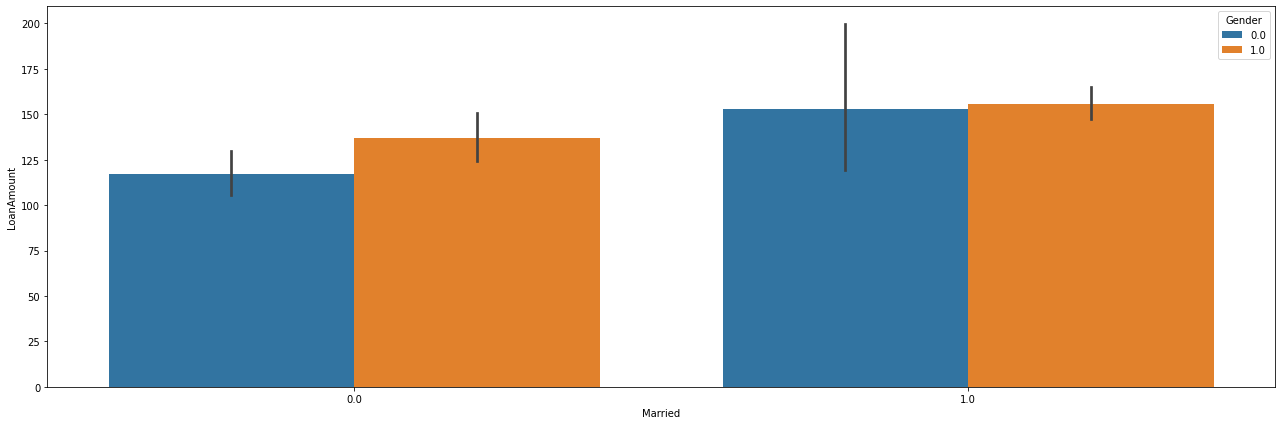

In [111]:
plt.figure(figsize = (22,7))
sb.barplot(x="Married", y="LoanAmount", hue = 'Gender', data = df)
plt.show()

Observation: 

    We can see that married women apply for as much loans as the male counterparts when compared to unmarried individuals. 

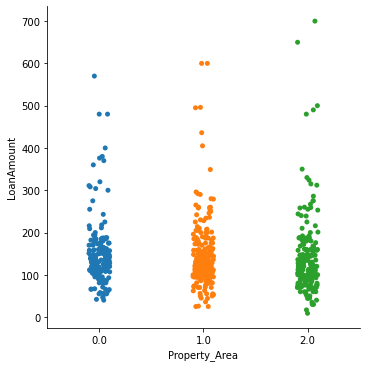

In [112]:
sb.catplot(x="Property_Area", y="LoanAmount", data=df)

Observation: 
    
    Irrespective of the Property area, the number of applicants for the lower amount loans are high. 
    People in rural areas don't apply for higher amount loans as compared to semi_urban and urban folks. 

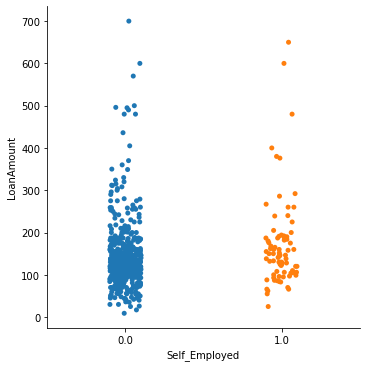

In [113]:
sb.catplot(x="Self_Employed", y="LoanAmount", data=df)

Observation: 
    
    We can see that employed people take out more loans as compared to self-employed people. 

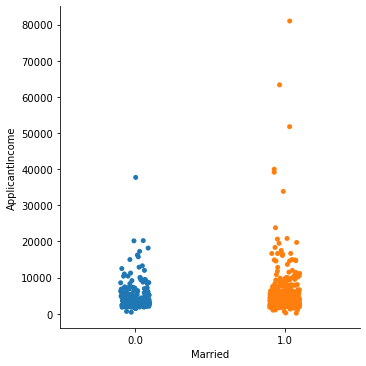

In [114]:
sb.catplot(x="Married", y="ApplicantIncome", data=df)

Observation: 
    
    Married applicants have higher income when compared with unmarried applicants. 

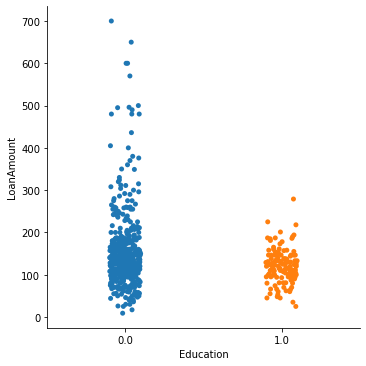

In [115]:
sb.catplot(x="Education", y="LoanAmount", data=df)

Observation: 

    We can see that graduates apply for more loan when compared to non-graduates

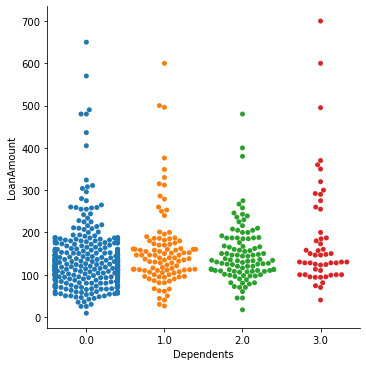

In [116]:
sb.catplot(x="Dependents", y='LoanAmount', data = df, kind="swarm")

Observation: 

    People with higher number of dependents apply for lesser number of loans. 
    People with no dependents apply for the highest number of loans. 

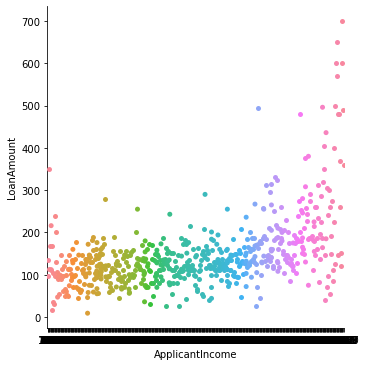

In [117]:
sb.catplot(x='ApplicantIncome', y='LoanAmount', data = df, kind="swarm")

Higher the applicant income, higher the loanamount

### Summary

In [118]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


<AxesSubplot:>

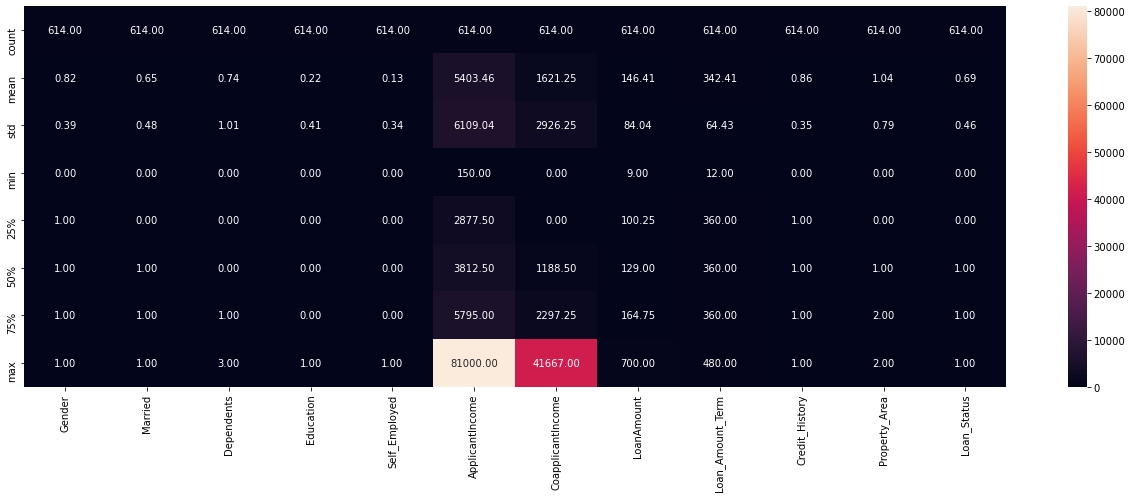

In [119]:
plt.figure(figsize = (22,7))
sb.heatmap(df.describe(), annot = True, fmt = '0.2f')

Observation: 
    
    We can see that the highest difference between mean and max values are in ApplicantIncome, Coappliantincome, and Loanamount
    
    ApplicationIncome and Coapplicantincome has the highest difference between 75% and Max values. This shows that there are outliers in those columns. 

### Correlation

In [120]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,-0.004705,1.000000,0.001963,0.540556


<AxesSubplot:>

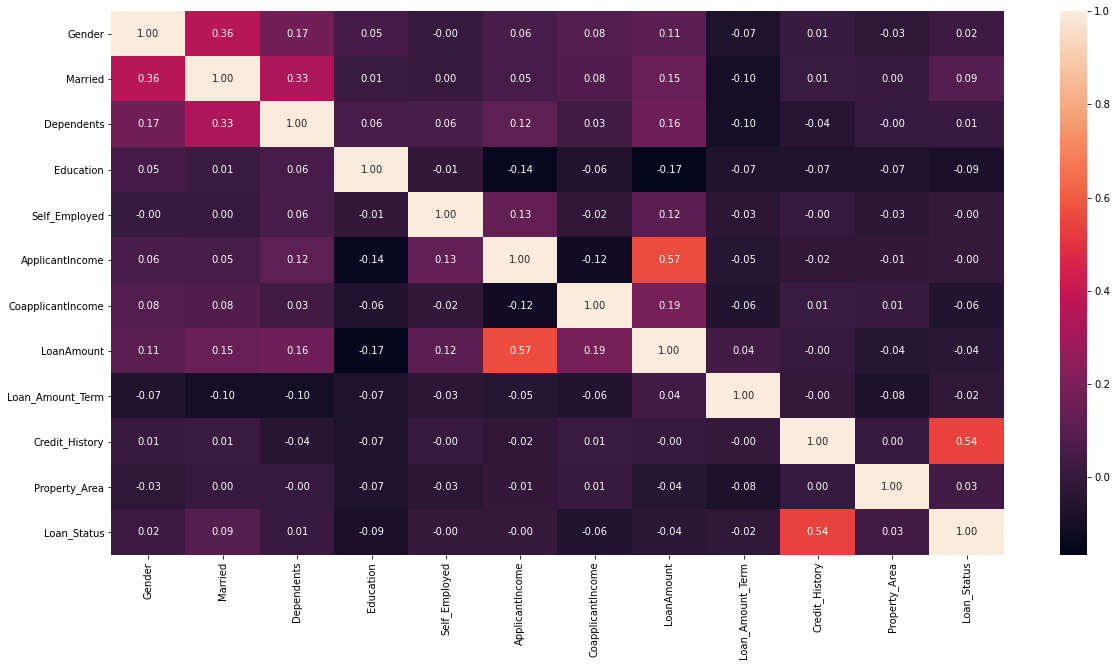

In [121]:
plt.figure(figsize = (20,10))
sb.heatmap(df.corr(), annot = True, fmt = '0.2f')

<AxesSubplot:>

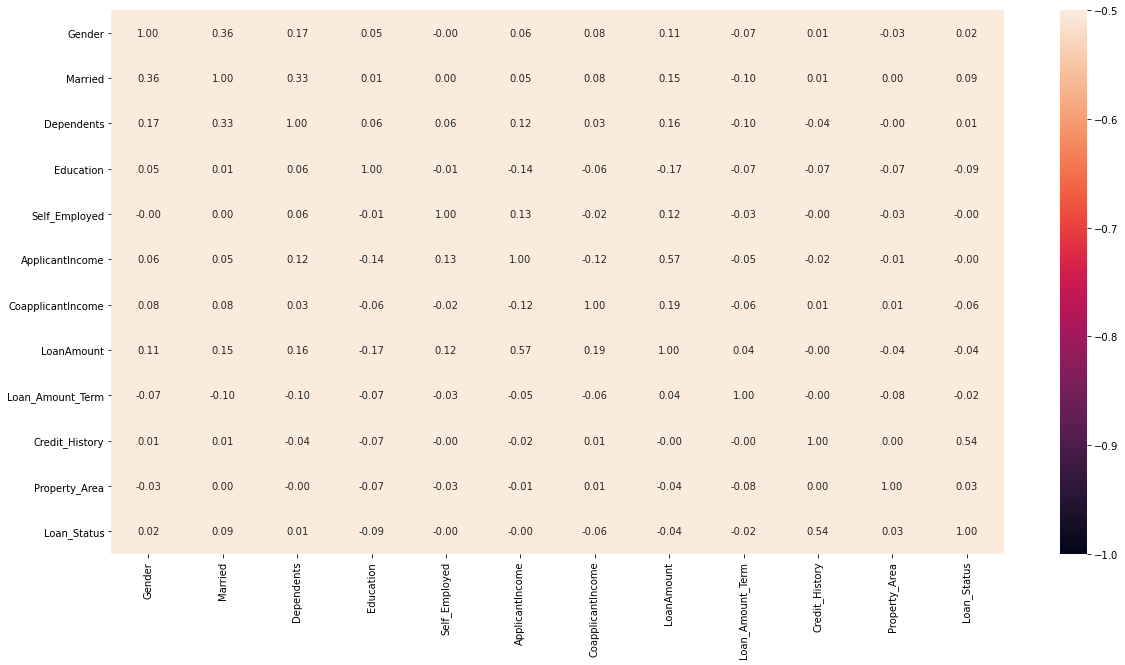

In [122]:
#Highlighting all the values lower than -0.5
#Plot to highlight high negative correlations.
plt.figure(figsize = (20,10))
sb.heatmap(df.corr(), annot = True, fmt = '0.2f', vmin = -0.5, vmax = -1)

We can see that there are no values that show high negative correlation. 

<AxesSubplot:>

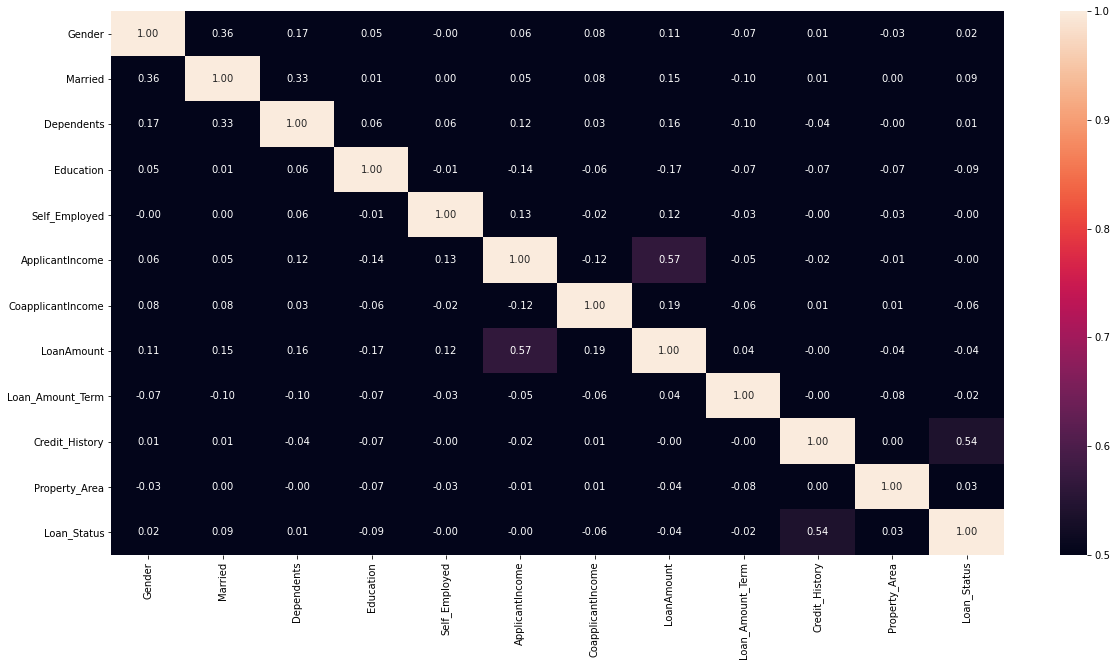

In [123]:
#Highlighting all the values greater than 0.5
#Plot to highlight high positive correlations.
plt.figure(figsize = (20,10))
sb.heatmap(df.corr(), annot = True, fmt = '0.2f', vmin = 0.5, vmax = 1)

Observation: 

    We can see that the only two column with a positive correlation value above 0.5 is Applicant income vs Loan amount & Credit history vs Loan status.

### Checking for outliers

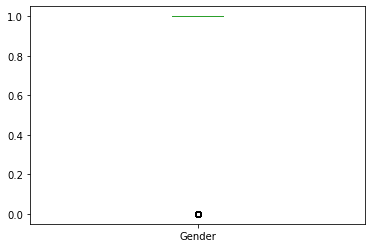

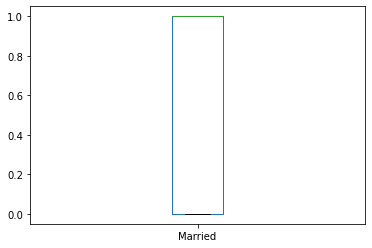

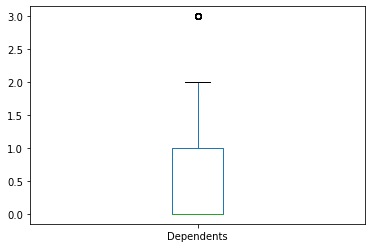

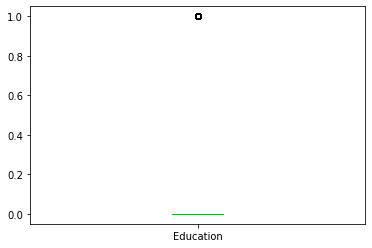

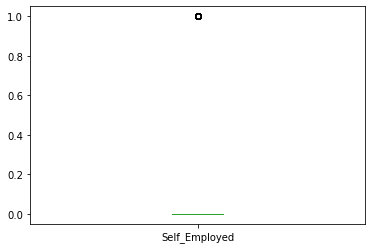

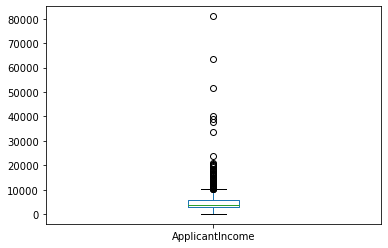

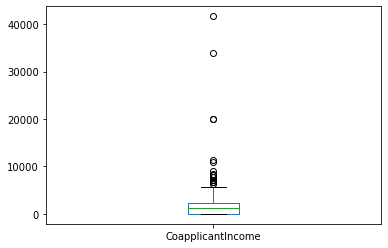

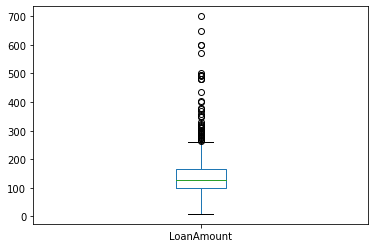

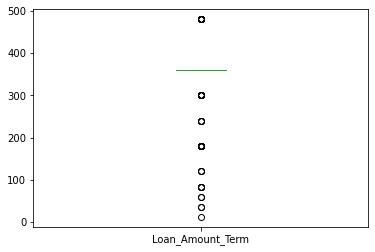

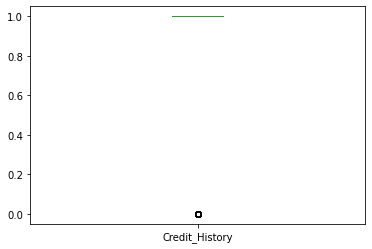

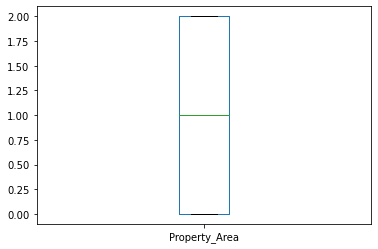

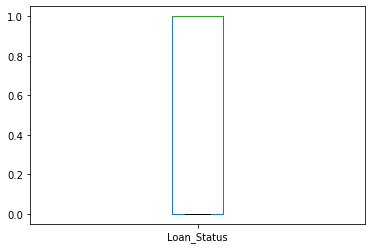

In [124]:
for i in df.columns: 
    df[i].plot.box()
    plt.show()

Observation: 

    We can see that there are high number of outliers in ApplicantIncome, CoapplicantIncome, and Loan Amount.

### Dealing with outliers

In [125]:
from scipy.stats import zscore

In [126]:
z = np.abs(zscore(df))
threshold = 3
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
        7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
       dtype=int64))

In [127]:
#We can see that there are only less number of outliers. 
z[9][6]

3.196712546212882

In [128]:
df_new = df[(z<3).all(axis = 1)]
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


In [129]:
df_new.shape

(577, 12)

In [130]:
df.shape

(614, 12)

In [131]:
#Finding the percentage of dataloss

loss = ((614-577)/614)*100
loss

6.026058631921824

Since the dataloss percent is 6, we can proceed to remove the outliers.

In [132]:
df = df_new

### Splitting X and Y

In [133]:
x = df.drop('Loan_Status', axis = 1)
y = df['Loan_Status']

In [134]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0


In [135]:
y.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: Loan_Status, dtype: float64

### Scaling

In [136]:
from sklearn.preprocessing import StandardScaler

In [137]:
ss = StandardScaler()

In [138]:
x = ss.fit_transform(x)

In [139]:
x = pd.DataFrame(x, columns = new_col)
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.399266,-0.861036,0.184585,0.230853,0.418513,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,-0.028020,0.052840,-0.143355,0.230853,0.418513,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.562297,-0.861036,-1.247642,0.230853,0.418513,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.703039,0.567956,-0.285844,0.230853,0.418513,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.450230,-0.861036,0.088189,0.230853,0.418513,1.227472


### Checking for Skewness

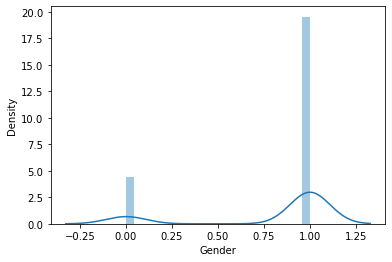

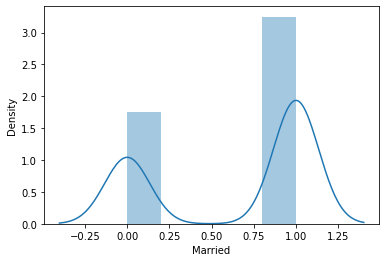

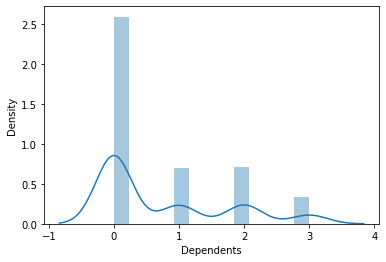

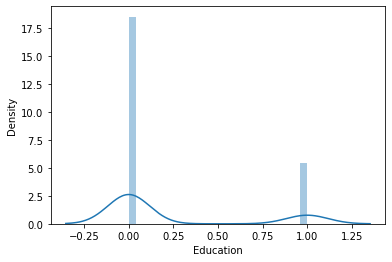

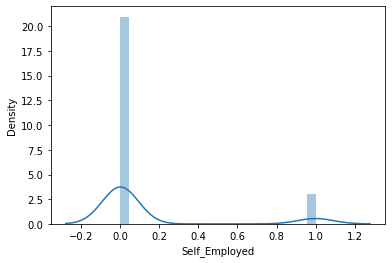

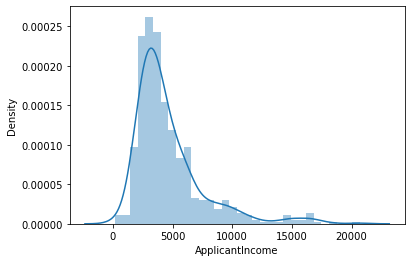

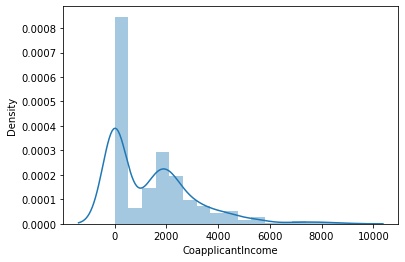

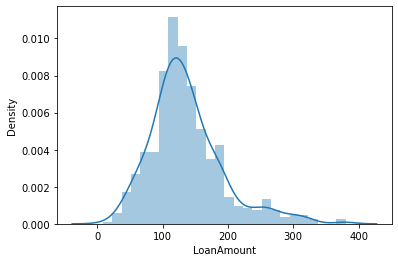

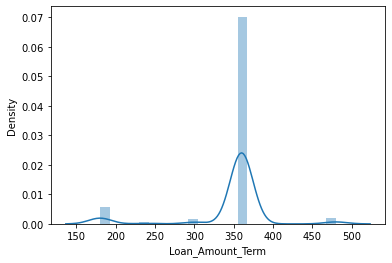

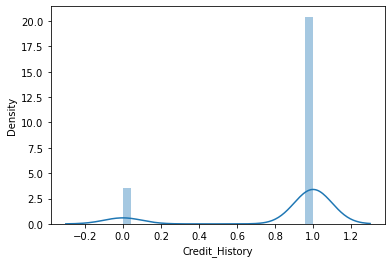

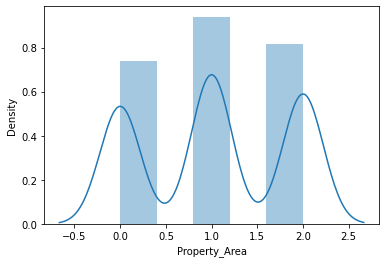

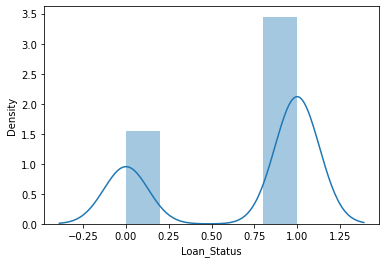

In [140]:
for i in df.columns: 
    sb.distplot(df[i], kde = True)
    plt.show()

Observations: 

    We can see skewness in the ApplicantIncome column

In [141]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

We can see high skewness in ApplicantIncome, CoapplicantIncome, LoanAmount

### Handling the Skewness

In [142]:
from sklearn.preprocessing import PowerTransformer

In [143]:
skew_col = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
pt = PowerTransformer(method='yeo-johnson')

In [144]:
for i in skew_col:
    x = pt.fit_transform(x)

In [145]:
x = pd.DataFrame(x, columns = new_col)
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.819007,-0.541961,-0.380580,0.830811,-1.062427,0.360961,0.137291,0.418513,1.239322
1,0.477137,0.733939,1.124247,-0.541961,-0.380580,0.380178,0.498619,0.012315,0.137291,0.418513,-1.293073
2,0.477137,0.733939,-0.819007,-0.541961,2.627567,-0.568553,-1.062427,-1.517470,0.137291,0.418513,1.239322
3,0.477137,0.733939,-0.819007,1.845150,-0.380580,-0.904175,0.890278,-0.155946,0.137291,0.418513,1.239322
4,0.477137,-1.362511,-0.819007,-0.541961,-0.380580,0.873161,-1.062427,0.263991,0.137291,0.418513,1.239322


### Importing the models

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [147]:
lr = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
abc = AdaBoostClassifier()

In [148]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 50)

In [149]:
x_train.shape

(403, 11)

In [150]:
x_test.shape

(174, 11)

In [151]:
y_train.shape

(403,)

In [152]:
y_test.shape

(174,)

In [153]:
model = [lr, gnb, svc, rfc, dtc, knc, abc]
for m in model: 
    m.fit(x_train, y_train)
    pred = m.predict(x_test)
    print('Accuracy Score  : ', m)
    print(accuracy_score(y_test, pred))
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))

Accuracy Score  :  LogisticRegression()
0.8333333333333334
[[ 25  27]
 [  2 120]]
              precision    recall  f1-score   support

         0.0       0.93      0.48      0.63        52
         1.0       0.82      0.98      0.89       122

    accuracy                           0.83       174
   macro avg       0.87      0.73      0.76       174
weighted avg       0.85      0.83      0.81       174

Accuracy Score  :  GaussianNB()
0.8218390804597702
[[ 28  24]
 [  7 115]]
              precision    recall  f1-score   support

         0.0       0.80      0.54      0.64        52
         1.0       0.83      0.94      0.88       122

    accuracy                           0.82       174
   macro avg       0.81      0.74      0.76       174
weighted avg       0.82      0.82      0.81       174

Accuracy Score  :  SVC()
0.8275862068965517
[[ 25  27]
 [  3 119]]
              precision    recall  f1-score   support

         0.0       0.89      0.48      0.62        52
         1.0  

### Cross Validation

In [154]:
from sklearn.model_selection import cross_val_score

In [155]:
model = [lr, gnb, svc, rfc, dtc, knc, abc]
for m in model:
    print(m)
    i = []
    for a in range (2,10):
        score = cross_val_score(m, x, y, cv = a)
        k = score.mean()
        i.append(k)
    print(i)
    print('CV Value = ', i.index(max(i))+2)
    print('Best Score =' , max(i))
    print('\n')

LogisticRegression()
[0.8111123125720876, 0.8145689407023604, 0.8145593869731801, 0.8180809595202397, 0.8179947021764032, 0.8164224843625373, 0.8162813926940639, 0.816292735042735]
CV Value =  5
Best Score = 0.8180809595202397


GaussianNB()
[0.8111243271818531, 0.8128328295912493, 0.8128352490421455, 0.8181109445277361, 0.8145045819014891, 0.8147432937324209, 0.8128091704718416, 0.8128205128205128]
CV Value =  5
Best Score = 0.8181109445277361


SVC()
[0.8163386678200693, 0.8197682786413356, 0.8197557471264368, 0.8198200899550224, 0.8197129152348225, 0.8199068049200287, 0.8197536149162861, 0.8197649572649572]
CV Value =  7
Best Score = 0.8199068049200287


RandomForestClassifier()
[0.7868247789311803, 0.8023981721358665, 0.7902658045977011, 0.7885907046476761, 0.8024054982817869, 0.802527181898325, 0.7989678462709284, 0.8007211538461538]
CV Value =  7
Best Score = 0.802527181898325


DecisionTreeClassifier()
[0.7001694059976932, 0.7243541306850892, 0.7035919540229886, 0.73314842578710

We can see that the best model is GaussianNB

In [156]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
pred_gnb = gnb.predict(x_test)
print('Accuracy score: ')
print(accuracy_score(y_test, pred_gnb))
print(confusion_matrix(y_test, pred_gnb))
print(classification_report(y_test, pred_gnb))

Accuracy score: 
0.8218390804597702
[[ 28  24]
 [  7 115]]
              precision    recall  f1-score   support

         0.0       0.80      0.54      0.64        52
         1.0       0.83      0.94      0.88       122

    accuracy                           0.82       174
   macro avg       0.81      0.74      0.76       174
weighted avg       0.82      0.82      0.81       174



### AUC_ROC Curve

In [157]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [158]:
y_pred_prob = gnb.predict_proba(x_test)[:, 0]

In [159]:
y_pred_prob

array([1.        , 0.63941024, 0.16118731, 0.05266984, 0.26554865,
       0.62651247, 0.03275058, 0.39206839, 0.13870957, 1.        ,
       0.47343629, 0.03294434, 1.        , 0.02394199, 0.44624993,
       1.        , 0.03723194, 1.        , 1.        , 0.08241273,
       1.        , 0.99497399, 0.08104281, 0.03167036, 0.04329579,
       0.02967077, 0.04122618, 0.09425102, 1.        , 0.03266428,
       0.09434811, 0.0657873 , 0.07573996, 0.08450564, 0.03721094,
       1.        , 0.07458668, 1.        , 0.07036578, 0.03017561,
       0.07669023, 0.03741086, 0.30361385, 0.06157059, 0.05265542,
       0.02443409, 0.02750279, 0.04153094, 0.02773279, 0.30529539,
       1.        , 0.02818543, 1.        , 0.52928974, 0.02757367,
       0.0287532 , 0.03542814, 0.0294482 , 0.05668493, 0.02624677,
       1.        , 0.04188291, 0.03238332, 0.07120806, 0.03817903,
       0.03271869, 0.06033579, 0.0281988 , 0.02191855, 0.06221186,
       0.02864533, 0.02214025, 0.02591054, 0.13002049, 0.02748

In [160]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [161]:
fpr

array([0.        , 0.01923077, 0.03846154, 0.05769231, 0.09615385,
       0.13461538, 0.17307692, 0.25      , 0.28846154, 0.30769231,
       0.38461538, 0.5       , 0.5       , 0.51923077, 0.51923077,
       0.53846154, 0.53846154, 0.55769231, 0.55769231, 0.57692308,
       0.57692308, 0.59615385, 0.59615385, 0.61538462, 0.61538462,
       0.63461538, 0.63461538, 0.65384615, 0.65384615, 0.67307692,
       0.67307692, 0.69230769, 0.69230769, 0.71153846, 0.71153846,
       0.73076923, 0.73076923, 0.75      , 0.75      , 0.76923077,
       0.76923077, 0.80769231, 0.80769231, 0.84615385, 0.84615385,
       0.92307692, 0.92307692, 0.94230769, 0.94230769, 0.96153846,
       0.96153846, 0.98076923, 0.98076923, 1.        ])

In [162]:
tpr

array([0.        , 0.        , 0.00819672, 0.00819672, 0.00819672,
       0.00819672, 0.00819672, 0.00819672, 0.01639344, 0.01639344,
       0.01639344, 0.01639344, 0.03278689, 0.03278689, 0.04918033,
       0.04918033, 0.06557377, 0.06557377, 0.13114754, 0.13114754,
       0.16393443, 0.16393443, 0.17213115, 0.17213115, 0.18032787,
       0.18032787, 0.20491803, 0.20491803, 0.32786885, 0.32786885,
       0.3442623 , 0.3442623 , 0.35245902, 0.35245902, 0.36065574,
       0.36065574, 0.37704918, 0.37704918, 0.47540984, 0.47540984,
       0.54918033, 0.54918033, 0.55737705, 0.55737705, 0.63114754,
       0.63114754, 0.75409836, 0.75409836, 0.81967213, 0.81967213,
       0.93442623, 0.93442623, 1.        , 1.        ])

In [163]:
thresholds

array([2.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.99497399, 0.64324469, 0.63941024, 0.56393764,
       0.54267831, 0.47343629, 0.44624993, 0.16845892, 0.16118731,
       0.10300881, 0.10008614, 0.09693777, 0.09674902, 0.09535128,
       0.09502281, 0.08848791, 0.08450564, 0.07036578, 0.0657873 ,
       0.06221186, 0.06157059, 0.06033579, 0.0593956 , 0.05668493,
       0.05595237, 0.05464856, 0.05266984, 0.04076837, 0.03906022,
       0.03576459, 0.03561419, 0.03542814, 0.03448616, 0.03271536,
       0.03252633, 0.02967077, 0.02958153, 0.0281988 , 0.02818543,
       0.02420322, 0.02394199, 0.02145748, 0.02034811])

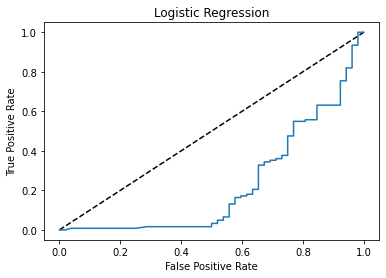

In [164]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.show()

In [165]:
auc_score = roc_auc_score(y_test, lr.predict(x_test))

In [166]:
print(auc_score)

0.7321878940731399


### GridSearchCV

In [167]:
from sklearn.model_selection import GridSearchCV

In [168]:
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
gnb = GaussianNB()
gnbcv = GridSearchCV(gnb, parameters)
gnbcv.fit(x_train, y_train)

print(gnbcv.best_params_)

{'var_smoothing': 0.657933224657568}


In [169]:
gnb_final = GaussianNB(var_smoothing = 0.657933224657568)
gnb_final.fit(x_train, y_train)
pred_gnb = gnb_final.predict(x_test)
print('Accuracy Score  : ', gnb_final)
print(accuracy_score(y_test, pred_gnb))
print(confusion_matrix(y_test, pred_gnb))
print(classification_report(y_test, pred_gnb))

Accuracy Score  :  GaussianNB(var_smoothing=0.657933224657568)
0.8333333333333334
[[ 26  26]
 [  3 119]]
              precision    recall  f1-score   support

         0.0       0.90      0.50      0.64        52
         1.0       0.82      0.98      0.89       122

    accuracy                           0.83       174
   macro avg       0.86      0.74      0.77       174
weighted avg       0.84      0.83      0.82       174



We're getting 83% accuracy for this model

In [170]:
data = [pred_gnb, y_test]
pd.DataFrame(data, index = ['Predicted', 'Actual'])

,0,1,2,3,4,5,6,7,8,9,...,164,165,166,167,168,169,170,171,172,173
Predicted,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
Actual,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0


### Creating OBJ file

In [171]:
import joblib

In [172]:
joblib.dump(gnb_final, 'Loan_application_status.obj')

['Loan_application_status.obj']

### Re-importing the model 

In [173]:
final = joblib.load('Loan_application_status.obj')
final.predict(x_train)

array([1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1.

### Conclusion

In [174]:
conclusion = pd.DataFrame([final.predict(x_test)[:], pred_gnb[:]], index = ['Predicted', 'Original'])

In [175]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,164,165,166,167,168,169,170,171,172,173
Predicted,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
Original,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
